HABERMAN data visualization

In [ ]:
#Importing all the libraries
#importing the data directly from raw github
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
'''downlaod haberman.csv from https://raw.githubusercontent.com/jbrownlee/Datasets/d20fcb6402ae34e653d4513b00f39257bb37ed7f/haberman.csv'''
# Loading the data from raw github link
haberman= pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/d20fcb6402ae34e653d4513b00f39257bb37ed7f/haberman.csv")

In [ ]:
# Determining the shape of the data like rows and columns
print(haberman.shape)


(305, 4)


In [ ]:
# Adding column headings to the data 
haberman.columns = ['age', 'year', 'nodes', 'class']
print(haberman.columns)

Index(['age', 'year', 'nodes', 'class'], dtype='object')


In [ ]:
# Understanding the data 
x=haberman.describe()
print(x)
# Here we can see limit and spread of the data like the min age or the mean age. A good measure of the data on an early basis

              age        year       nodes       class
count  305.000000  305.000000  305.000000  305.000000
mean    52.531148   62.849180    4.036066    1.265574
std     10.744024    3.254078    7.199370    0.442364
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     61.000000   66.000000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


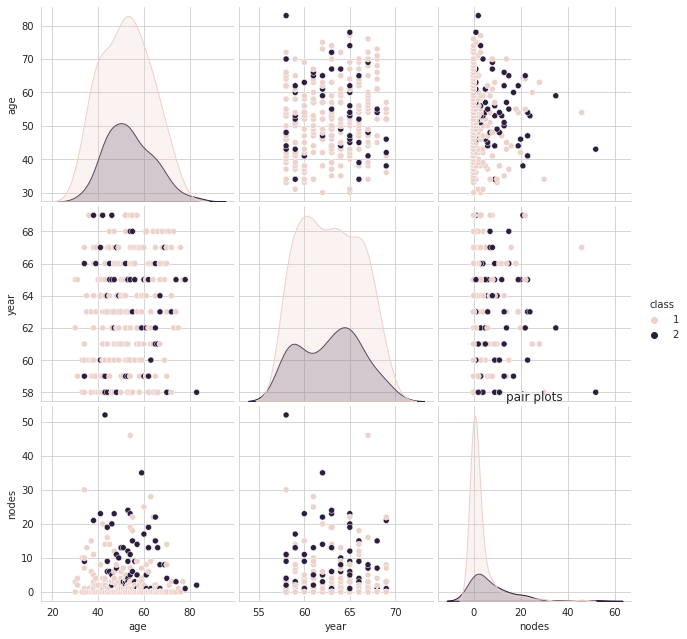

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="class", size=3);
plt.title("pair plots");
plt.show()
# Plotting pair plots to see the relation between the finalresult(class) and other columns to see how much influence they have on the final outcome.

In [ ]:
# From the above plots we can see that the column nodes have higher impact on the outcome when compared to column "YEAR" AND "AGE".
#Looking at this we can take nodes in account for more data analysis

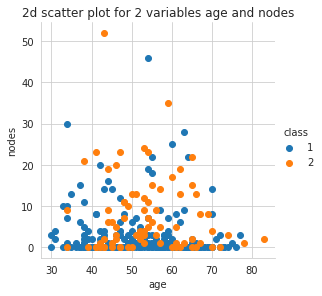

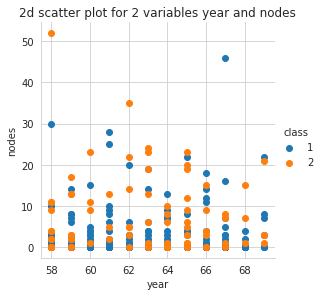

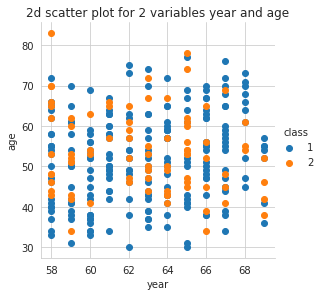

In [ ]:
# If too many columns and we do not wish to see all the colums using pair plots we can also draw them seprately
from seaborn.relational import scatterplot
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue= "class", size=4) \
.map(plt.scatter,"age","nodes") \
.add_legend();
plt.title("2d scatter plot for 2 variables age and nodes")
plt.show()

from seaborn.relational import scatterplot
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue= "class", size=4) \
.map(plt.scatter,"year","nodes") \
.add_legend();
plt.title("2d scatter plot for 2 variables year and nodes")
plt.show()

from seaborn.relational import scatterplot
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue= "class", size=4) \
.map(plt.scatter,"year","age") \
.add_legend();
plt.title("2d scatter plot for 2 variables year and age")
plt.show()

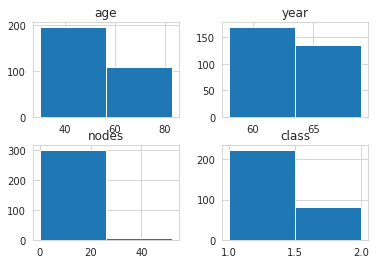

In [ ]:
haberman.hist(bins=2)
plt.xlabel("")
plt.show()

In [ ]:
# Plotting the histogram to check the density of the data points.
# Here we can conclude that the maximum percentage of nodes in the data are from the range 0 to 20. Same applies to all the columns if were to conclude.

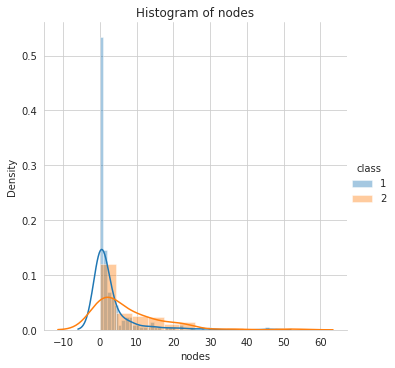

In [ ]:
sns.FacetGrid(haberman, hue="class", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram of nodes')
plt.show();


From the above plot we can see the density of people who survived with lesser amount of nodes and as the nodes increases the people who died also increases

[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


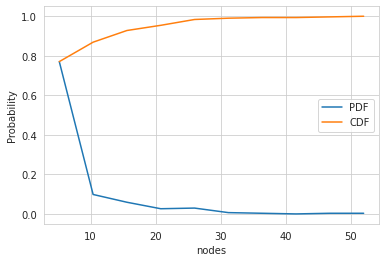

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


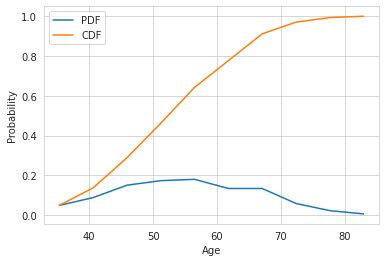

[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


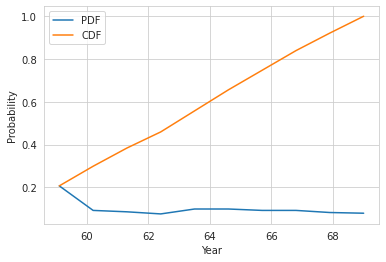

In [ ]:
# Plotting PDF and CDF of the given data
counts, bin_edges = np.histogram(haberman['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.xlabel('nodes')
plt.ylabel('Probability')
plt.legend()
plt.show()

counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.legend()
plt.show()

counts, bin_edges = np.histogram(haberman['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.xlabel('Year')
plt.ylabel('Probability')
plt.legend()
plt.show()

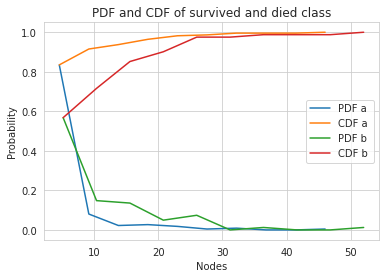

In [ ]:
# Sorting the data into the ones who survived and ones who died to get a deeper understanding
survived=haberman.loc[haberman["class"]==1]
died=haberman.loc[haberman["class"]==2]

counts, bin_edges = np.histogram(survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF a ')
plt.plot(bin_edges[1:], cdf, label='CDF a')

counts, bin_edges = np.histogram(died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF b ')
plt.plot(bin_edges[1:], cdf, label='CDF b')

plt.title('PDF and CDF of survived and died class')
plt.xlabel('Nodes')
plt.ylabel('Probability')
plt.legend()
plt.show()





From the above figure we see that the probability of people surviving(PDF a) decreases as the number of nodes increases but in case of people who died the line decreases initally with nodes increasing but later fluctuates and gives sign of deaths dependence on amount of nodes

In [ ]:
survived.describe()

,age,year,nodes,class
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [ ]:
died.describe()

,age,year,nodes,class
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


From the above two tables we can note and compare the mean, percentiles etc of the people who died and survived based on the data for better understanding. Like the min age of year of operation etc

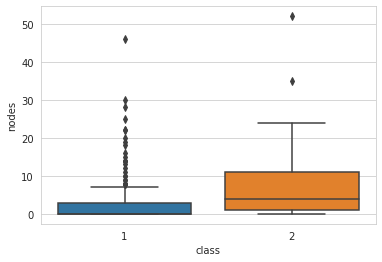

In [ ]:
sns.boxplot(x='class',y='nodes', data=haberman)
plt.show()

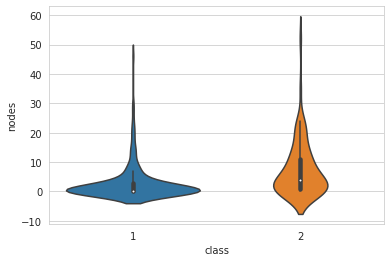

In [ ]:
sns.violinplot(x='class',y='nodes', data=haberman)
plt.show()

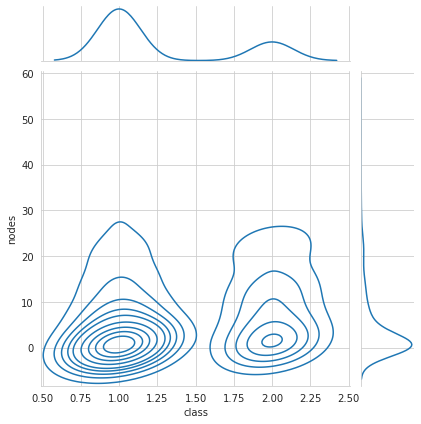

In [ ]:
sns.jointplot(x='class',y='nodes', data=haberman, kind="kde")
plt.show()

The above plots indicate the denser region of the people who survived with class=1 and a narrow height tells us there were less people who survived with higher nodes and the figure next to it shows the lesser dense region of people who died with less nodes and vice versa.

**OVERALL CONCLUSION**
From scatter plots
1. Looking at the scatter plots we can see that the number of nodes columns have higher impact on the outcome(class)
2. By looking at year pairplot, we see that the amount of people died firat increases and from year 58 to 62 decreases and later increases and follow same pattern as rest of the graph
3. WE also see that the people survived(class=1) are more when the nodes are decreasing and decreases sharply as the nodes increases

From PDF and CDF
We see that the line which represents PDF A(PDF of people who survived) decreases sharply when nodes increased and the probability of surviving is way too less and in case of PDF B the line shows both upward and downward trend hence from that we can conclude that as the nodes increases the people who died also shows upward trend to some extent.

From Histogram we note that most nodes are in the range of 0 to 20.

From violin plot and joint plot we can see the narrow shape as when the nodes are increased for class 1 label and vice versa. For class 2 the width becomes more st the top when nodes are increased. 

From PDF and CDF
we see that the probability of people survived comes down to 0.1 as the nodes croos value of 10 and keeps decreasing and the probability off people who dies becomes 0.175 as the nodes crosses 10 and the show both upward and downward trend.
